<a href="https://colab.research.google.com/github/RanjaniGanesh/Chennai-house-price-prediction/blob/main/Mainproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Importing the packages**

In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


**Importing the data**

In [ ]:
data =pd.read_csv("/content/drive/MyDrive/train-chennai-sale.csv")
data.head()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250


**Describe the data**

In [ ]:
data.describe()

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
count,7109.000000,7109.000000,7108.000000,7104.000000,7109.000000,7109.000000,7109.000000,7109.000000,7061.000000,7109.000000,7109.000000,7.109000e+03
mean,1382.073006,99.603179,1.637029,1.213260,3.688704,3.517471,3.507244,3.485300,3.503254,376938.330708,141005.726544,1.089491e+07
std,457.410902,57.403110,0.802902,0.409639,1.019099,0.891972,0.897834,0.887266,0.527223,143070.662010,78768.093718,3.768603e+06
min,500.000000,0.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,71177.000000,5055.000000,2.156875e+06
25%,993.000000,50.000000,1.000000,1.000000,3.000000,2.700000,2.700000,2.700000,3.130000,272406.000000,84219.000000,8.272100e+06
50%,1373.000000,99.000000,1.000000,1.000000,4.000000,3.500000,3.500000,3.500000,3.500000,349486.000000,127628.000000,1.033505e+07
75%,1744.000000,148.000000,2.000000,1.000000,4.000000,4.300000,4.300000,4.300000,3.890000,451562.000000,184506.000000,1.299390e+07
max,2500.000000,200.000000,4.000000,2.000000,6.000000,5.000000,5.000000,5.000000,4.970000,983922.000000,495405.000000,2.366734e+07


**Drop the unnecessary column("PRT_ID","REG_FEE","COMMIS")**

In [ ]:
data.drop(['PRT_ID','REG_FEE','COMMIS'],axis =1)


,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE
0,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,15-05-1967,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,7600000
1,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,22-12-1995,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,21717770
2,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,09-02-1992,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,13159200
3,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,18-03-1988,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,9630290
4,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,13-10-1979,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,7406250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,Karapakkam,598,03-01-2011,51,1.0,1.0,2,AdjLand,No,15-01-1962,Others,ELO,No Access,RM,3.0,2.2,2.4,2.520,5353000
7105,Velachery,1897,08-04-2004,52,3.0,2.0,5,Family,Yes,11-04-1995,Others,NoSeWa,No Access,RH,3.6,4.5,3.3,3.920,10818480
7106,Velachery,1614,25-08-2006,152,2.0,1.0,4,Normal Sale,No,01-09-1978,House,NoSeWa,Gravel,I,4.3,4.2,2.9,3.840,8351410
7107,Karapakkam,787,03-08-2009,40,1.0,1.0,2,Partial,Yes,11-08-1977,Commercial,ELO,Paved,RL,4.6,3.8,4.1,4.160,8507000


**Handle the missing values by filling either mean or median or mode**

In [ ]:
#Check for missing or null values and get their counts
data.isnull().sum()

PRT_ID            0
AREA              0
INT_SQFT          0
DATE_SALE         0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
DATE_BUILD        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
REG_FEE           0
COMMIS            0
SALES_PRICE       0
dtype: int64

In [ ]:
#Fill the missing values by either mean or median or mode
data['N_BEDROOM'].fillna(data['N_BEDROOM'].mode())
data['N_BATHROOM'].fillna(data['N_BATHROOM'].mode())
data['QS_OVERALL'].fillna(data['QS_OVERALL'].mean())

0       4.330
1       3.765
2       3.090
3       4.010
4       3.290
        ...  
7104    2.520
7105    3.920
7106    3.840
7107    4.160
7108    3.640
Name: QS_OVERALL, Length: 7109, dtype: float64

In [ ]:
#Get the data types for each and every column in dataframe
data.dtypes

PRT_ID            object
AREA              object
INT_SQFT           int64
DATE_SALE         object
DIST_MAINROAD      int64
N_BEDROOM        float64
N_BATHROOM       float64
N_ROOM             int64
SALE_COND         object
PARK_FACIL        object
DATE_BUILD        object
BUILDTYPE         object
UTILITY_AVAIL     object
STREET            object
MZZONE            object
QS_ROOMS         float64
QS_BATHROOM      float64
QS_BEDROOM       float64
QS_OVERALL       float64
REG_FEE            int64
COMMIS             int64
SALES_PRICE        int64
dtype: object

In [ ]:
#Check for duplicated data in data frame
data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
7104    False
7105    False
7106    False
7107    False
7108    False
Length: 7109, dtype: bool

**Cleaning the data**

Clean the data and get all the unique values in each column

In [ ]:
data.loc[(data.AREA=='Karapakam'),'AREA']='Karapakkam'
data.loc[(data.AREA=='TNagar'),'AREA']='T Nagar'
data.loc[(data.AREA=='Chrompt'),'AREA']='Chrompet'
data.loc[(data.AREA=='Chrmpet'),'AREA']='Chrompet'
data.loc[(data.AREA=='Chormpet'),'AREA']='Chrompet'
data.loc[(data.AREA=='Ana Nagar'),'AREA']='Anna Nagar'
data.loc[(data.AREA=='Ann Nagar'),'AREA']='Anna Nagar'
data.loc[(data.AREA=='Adyr'),'AREA']='Adyar'
data.loc[(data.AREA=='Velchery'),'AREA']='Velachery'
data.loc[(data.AREA=='KKNagar'),'AREA']='KK Nagar'
print(data['AREA'].unique())

['Karapakkam' 'Anna Nagar' 'Adyar' 'Velachery' 'Chrompet' 'KK Nagar'
 'T Nagar']


In [ ]:
data.loc[(data.SALE_COND=='Ab Normal'),'SALE_COND']='AbNormal'
data.loc[(data.SALE_COND=='Partiall'),'SALE_COND']='Partial'
data.loc[(data.SALE_COND=='PartiaLl'),'SALE_COND']='Partial'
data.loc[(data.SALE_COND=='Adj Land'),'SALE_COND']='AdjLand'
print(data['SALE_COND'].unique())

['AbNormal' 'Family' 'Partial' 'AdjLand' 'Normal Sale']


In [ ]:
data.loc[(data.PARK_FACIL=='Noo'),'PARK_FACIL']='No'
print(data['PARK_FACIL'].unique())

['Yes' 'No']


In [ ]:
data.loc[(data.BUILDTYPE=='Comercial'),'BUILDTYPE']='Commercial'
data.loc[(data.BUILDTYPE=='Other'),'BUILDTYPE']='Others'
print(data['BUILDTYPE'].unique())

['Commercial' 'Others' 'House']


In [ ]:
data.loc[(data.UTILITY_AVAIL=='All Pub'),'UTILITY_AVAIL']='AllPub'
data.loc[(data.UTILITY_AVAIL=='NoSeWa'),'UTILITY_AVAIL']='NoSewr'
data.loc[(data.UTILITY_AVAIL=='NoSewr '),'UTILITY_AVAIL']='NoSewr'
print(data['UTILITY_AVAIL'].unique())

['AllPub' 'ELO' 'NoSewr']


In [ ]:
data.loc[(data.STREET=='Pavd'),'STREET']='Paved'
data.loc[(data.STREET=='NoAccess'),'STREET']='No Access'
print(data['STREET'].unique())

['Paved' 'Gravel' 'No Access']


In [ ]:
print(data['MZZONE'].unique())

['A' 'RH' 'RL' 'I' 'C' 'RM']


**Grouping the data**

Group the data based on particular criteria

In [ ]:
data.groupby('AREA')['AREA'].agg('count')

AREA
Adyar          774
Anna Nagar     788
Chrompet      1702
KK Nagar       997
Karapakkam    1366
T Nagar        501
Velachery      981
Name: AREA, dtype: int64

In [ ]:
data.groupby('SALE_COND')['SALE_COND'].agg('count')

SALE_COND
AbNormal       1411
AdjLand        1439
Family         1403
Normal Sale    1423
Partial        1433
Name: SALE_COND, dtype: int64

In [ ]:
data.groupby('STREET')['STREET'].agg('count')

STREET
Gravel       2520
No Access    2017
Paved        2572
Name: STREET, dtype: int64

In [ ]:
data.groupby('MZZONE')['MZZONE'].agg('count')

MZZONE
A      537
C      550
I      525
RH    1822
RL    1858
RM    1817
Name: MZZONE, dtype: int64

**Calculating the price per sq. feet**

In [ ]:
data['PRICE_PER_SQFT']= data['SALES_PRICE']/data['INT_SQFT']
data.head()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE,PRICE_PER_SQFT
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,...,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000,7569.721116
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,...,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770,10935.433031
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,...,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200,14476.567657
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,...,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290,5191.530997
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,...,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250,6040.986949


In [ ]:
grp =data.groupby(['AREA'])
grp.aggregate({'PRICE_PER_SQFT':'mean'})

,PRICE_PER_SQFT
AREA,
Adyar,9783.934955
Anna Nagar,8666.545412
Chrompet,10116.880041
KK Nagar,6767.160072
Karapakkam,6994.312104
T Nagar,8897.103910
Velachery,6354.402746


In [ ]:
data.groupby('AREA')['PRICE_PER_SQFT'].mean()

AREA
Adyar          9783.934955
Anna Nagar     8666.545412
Chrompet      10116.880041
KK Nagar       6767.160072
Karapakkam     6994.312104
T Nagar        8897.103910
Velachery      6354.402746
Name: PRICE_PER_SQFT, dtype: float64

In [ ]:
#data.groupby('AREA')['SALES_PRICE'].mean()
df =pd.DataFrame(data.groupby('AREA')['SALES_PRICE'].mean())
df

,SALES_PRICE
AREA,
Adyar,9.185668e+06
Anna Nagar,1.516820e+07
Chrompet,1.001381e+07
KK Nagar,1.269623e+07
Karapakkam,7.340100e+06
T Nagar,1.561674e+07
Velachery,1.104735e+07


In [ ]:
df1=df.sort_values(by='SALES_PRICE',ascending=True).reset_index()
df1

,AREA,SALES_PRICE
0,Karapakkam,7.340100e+06
1,Adyar,9.185668e+06
2,Chrompet,1.001381e+07
3,Velachery,1.104735e+07
4,KK Nagar,1.269623e+07
5,Anna Nagar,1.516820e+07
6,T Nagar,1.561674e+07


In [ ]:
df1['Sale']=df1['SALES_PRICE']/100000
df1

,AREA,SALES_PRICE,Sale
0,Karapakkam,7.340100e+06,73.401001
1,Adyar,9.185668e+06,91.856684
2,Chrompet,1.001381e+07,100.138096
3,Velachery,1.104735e+07,110.473530
4,KK Nagar,1.269623e+07,126.962287
5,Anna Nagar,1.516820e+07,151.682019
6,T Nagar,1.561674e+07,156.167426


In [ ]:
area=df1['AREA'].tolist()
area

['Karapakkam',
 'Adyar',
 'Chrompet',
 'Velachery',
 'KK Nagar',
 'Anna Nagar',
 'T Nagar']

In [ ]:
#data['AREA'].replace({'Karapakkam':1, 'Adyar': 2, 'Chrompet': '3', 'Velachery': '4', 'KK Nagar': '5', 'Anna Nagar': '6', 'T Nagar': '7'})

0       1
1       6
2       2
3       4
4       1
       ..
7104    1
7105    4
7106    4
7107    1
7108    4
Name: AREA, Length: 7109, dtype: object

**Calculating the house age**

In [ ]:
data['DATE_SALE']= pd.to_datetime(data['DATE_SALE'])
data['DATE_BUILD']=pd.to_datetime(data['DATE_BUILD'])

In [ ]:
data['YEAR_SOLD']=data['DATE_SALE'].dt.year
data['YEAR_BUILD']=data['DATE_BUILD'].dt.year

In [ ]:
data['HOUSE_AGE']=data['YEAR_SOLD']-data['YEAR_BUILD']

**Drop the column of unwanted features**

In [ ]:
data=data.drop(columns =["PRT_ID","DATE_SALE","DATE_BUILD" ,"REG_FEE" ,"YEAR_SOLD","YEAR_BUILD","COMMIS"])

In [ ]:
data.head()

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,PRICE_PER_SQFT,HOUSE_AGE
0,Karapakkam,1004,131,1.0,1.0,3,AbNormal,Yes,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,7600000,7569.721116,44
1,Anna Nagar,1986,26,2.0,1.0,5,AbNormal,No,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,21717770,10935.433031,11
2,Adyar,909,70,1.0,1.0,3,AbNormal,Yes,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,13159200,14476.567657,20
3,Velachery,1855,14,3.0,2.0,5,Family,No,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,9630290,5191.530997,22
4,Karapakkam,1226,84,1.0,1.0,3,AbNormal,Yes,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,7406250,6040.986949,30


**Exploratory Data Analysis**

**Visualize using scatter plot**

Visualise every features versus target variable using scatter plot

***Area vs sales price***


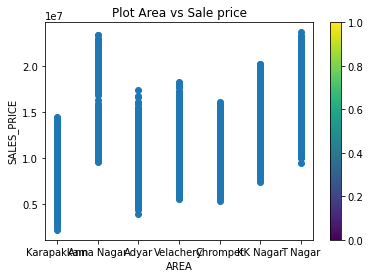

In [ ]:
plt.scatter(data['AREA'],data['SALES_PRICE'])
plt.title("Plot Area vs Sale price")
plt.xlabel('AREA')
plt.ylabel('SALES_PRICE')
plt.colorbar()
plt.show()

***Int-Sqft vs Sales price***

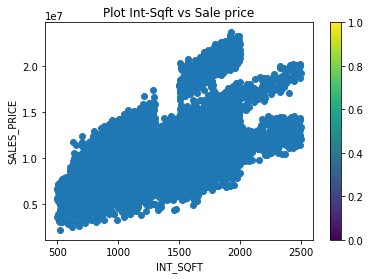

In [ ]:
plt.scatter(data['INT_SQFT'],data['SALES_PRICE'])
plt.title("Plot Int-Sqft vs Sale price")
plt.xlabel('INT_SQFT')
plt.ylabel('SALES_PRICE')
plt.colorbar()
plt.show()

***Distance_mainroad vs Sales price***

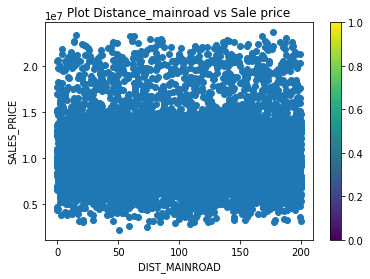

In [ ]:
plt.scatter(data['DIST_MAINROAD'],data['SALES_PRICE'])
plt.title("Plot Distance_mainroad vs Sale price")
plt.xlabel('DIST_MAINROAD')
plt.ylabel('SALES_PRICE')
plt.colorbar()
plt.show()

***No.of bedroom vs Sales price***

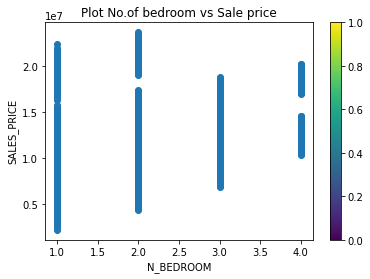

In [ ]:
plt.scatter(data['N_BEDROOM'],data['SALES_PRICE'])
plt.title("Plot No.of bedroom vs Sale price")
plt.xlabel('N_BEDROOM')
plt.ylabel('SALES_PRICE')
plt.colorbar()
plt.show()

***No.of bathroom vs Sales price***











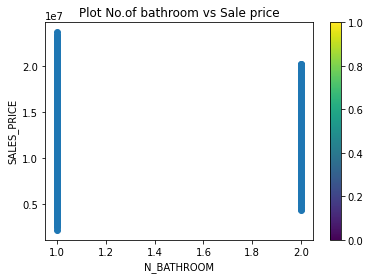

In [ ]:
plt.scatter(data['N_BATHROOM'],data['SALES_PRICE'])
plt.title("Plot No.of bathroom vs Sale price")
plt.xlabel('N_BATHROOM')
plt.ylabel('SALES_PRICE')
plt.colorbar()
plt.show()

***No. of room vs Sales price***

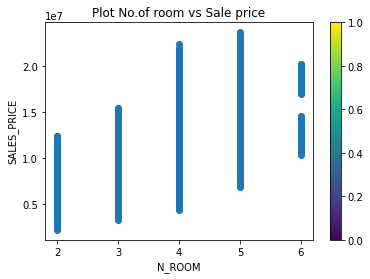

In [ ]:
plt.scatter(data['N_ROOM'],data['SALES_PRICE'])
plt.title("Plot No.of room vs Sale price")
plt.xlabel('N_ROOM')
plt.ylabel('SALES_PRICE')
plt.colorbar()
plt.show()

***Sale condition vs Sales price***

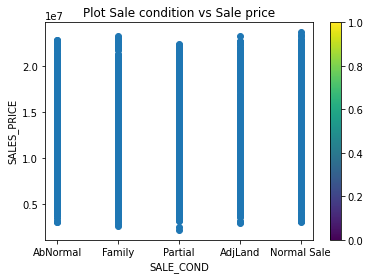

In [ ]:
plt.scatter(data['SALE_COND'],data['SALES_PRICE'])
plt.title("Plot Sale condition vs Sale price")
plt.xlabel('SALE_COND')
plt.ylabel('SALES_PRICE')
plt.colorbar()
plt.show()

***Parking facility vs Sales price***

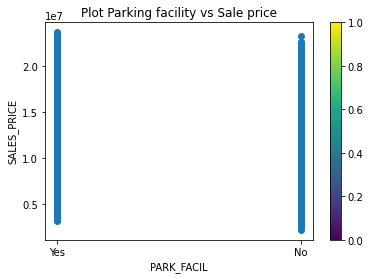

In [ ]:
plt.scatter(data['PARK_FACIL'],data['SALES_PRICE'])
plt.title("Plot Parking facility vs Sale price")
plt.xlabel('PARK_FACIL')
plt.ylabel('SALES_PRICE')
plt.colorbar()
plt.show()

***Building type vs Sales price***

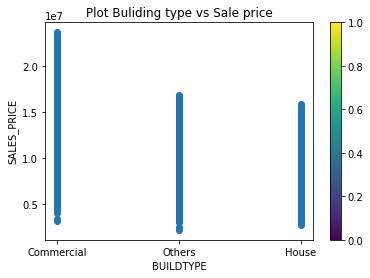

In [ ]:
plt.scatter(data['BUILDTYPE'],data['SALES_PRICE'])
plt.title("Plot Buliding type vs Sale price")
plt.xlabel('BUILDTYPE')
plt.ylabel('SALES_PRICE')
plt.colorbar()
plt.show()

***Utility available vs Sales price***

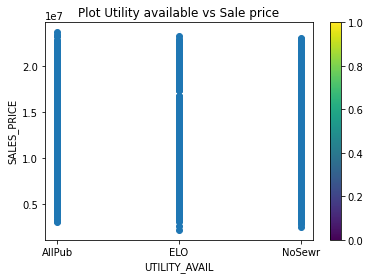

In [ ]:
plt.scatter(data['UTILITY_AVAIL'],data['SALES_PRICE'])
plt.title("Plot Utility available vs Sale price")
plt.xlabel('UTILITY_AVAIL')
plt.ylabel('SALES_PRICE')       
plt.colorbar()
plt.show()

***Street type vs Sales price***

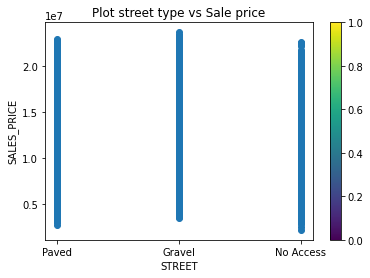

In [ ]:
plt.scatter(data['STREET'],data['SALES_PRICE'])
plt.title("Plot street type vs Sale price")
plt.xlabel('STREET')
plt.ylabel('SALES_PRICE')
plt.colorbar()
plt.show()

***MZ zone vs Salesprice***

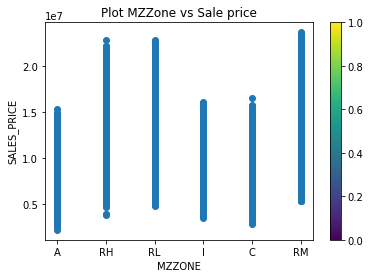

In [ ]:
plt.scatter(data['MZZONE'],data['SALES_PRICE'])
plt.title("Plot MZZone vs Sale price")
plt.xlabel('MZZONE')
plt.ylabel('SALES_PRICE')
plt.colorbar()
plt.show()

***QS room vs Sales price***

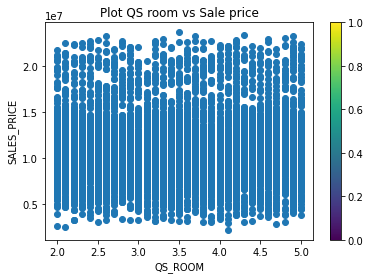

In [ ]:
plt.scatter(data['QS_ROOMS'],data['SALES_PRICE'])
plt.title("Plot QS room vs Sale price")
plt.xlabel('QS_ROOM')
plt.ylabel('SALES_PRICE')
plt.colorbar()
plt.show()

***QS_bathroom vs sales price***

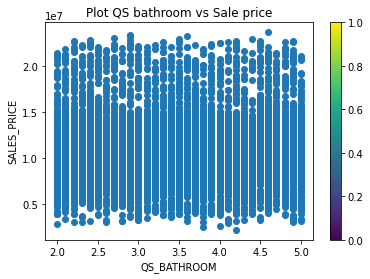

In [ ]:
plt.scatter(data['QS_BATHROOM'],data['SALES_PRICE'])
plt.title("Plot QS bathroom vs Sale price")
plt.xlabel('QS_BATHROOM')
plt.ylabel('SALES_PRICE')
plt.colorbar()
plt.show()

***QS bedroom vs sales price***

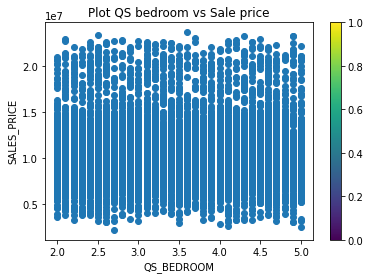

In [ ]:
plt.scatter(data['QS_BEDROOM'],data['SALES_PRICE'])
plt.title("Plot QS bedroom vs Sale price")
plt.xlabel('QS_BEDROOM')
plt.ylabel('SALES_PRICE')
plt.colorbar()
plt.show()

***QS overall vs Sales price***

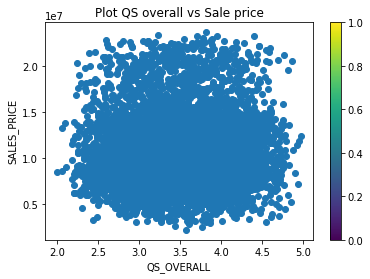

In [ ]:
plt.scatter(data['QS_OVERALL'],data['SALES_PRICE'])
plt.title("Plot QS overall vs Sale price")
plt.xlabel('QS_OVERALL')
plt.ylabel('SALES_PRICE')
plt.colorbar()
plt.show()

**Visualise the categorical features versus target variable using barplot**

***Area vs Sales price***

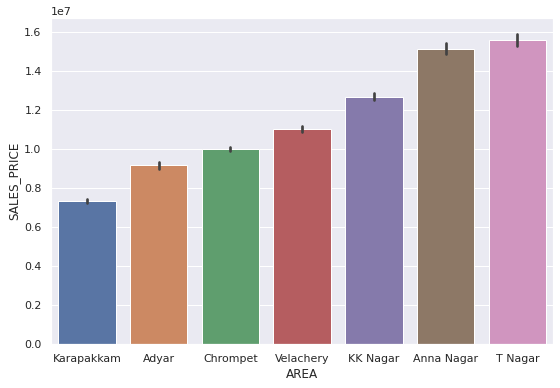

In [ ]:
sns.set_theme(style ="whitegrid")
sns.set(rc={'figure.figsize':(9,6)})
sns.barplot(x='AREA', y="SALES_PRICE",data=data,order =data.groupby("AREA")['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')["AREA"])

It seems that the sales price in the T-Nagar area is more costlier than rest of the area

There is a linear relationship between the area and the sales price

***Sale condition vs Sales price***

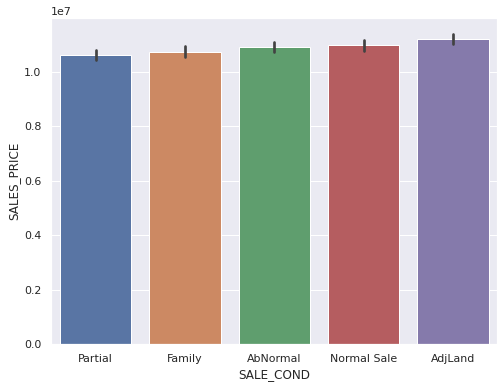

In [ ]:
sns.set_theme(style ="whitegrid")
sns.set(rc={'figure.figsize':(8,6)})
sns.barplot(x='SALE_COND', y="SALES_PRICE",data=data,order =data.groupby("SALE_COND")['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')["SALE_COND"])

It seems that more or less all types of sale condition have the same sales price

There is a slight linear relationship between the sale condition and the sales price

***Parking facility vs Sales price***

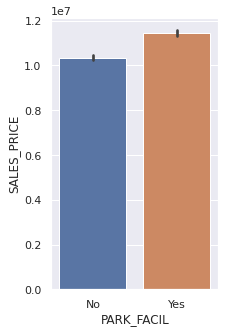

In [ ]:
sns.set_theme(style ="whitegrid")
sns.set(rc={'figure.figsize':(3,5)})
sns.barplot(x='PARK_FACIL', y="SALES_PRICE",data=data,order =data.groupby("PARK_FACIL")['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')["PARK_FACIL"])

The building with parking facility is expensive

There is a linear relationship between parking facility and the sales price

***Build type vs Sales price***

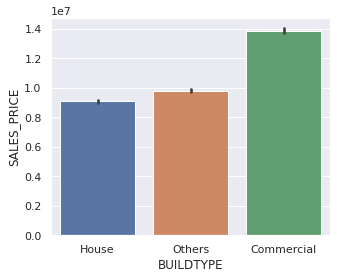

In [ ]:
sns.set_theme(style ="whitegrid")
sns.set(rc={'figure.figsize':(5,4)})
sns.barplot(x='BUILDTYPE', y="SALES_PRICE",data=data,order =data.groupby("BUILDTYPE")['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')["BUILDTYPE"])

The building for commercial purpose is more expensive when compared to others

There is no linear relationship between building type and the sales price

***Utility available vs Sales price***

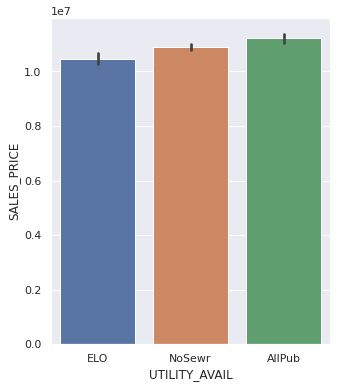

In [ ]:
sns.set_theme(style ="whitegrid")
sns.set(rc={'figure.figsize':(5,6)})
sns.barplot(x='UTILITY_AVAIL', y="SALES_PRICE",data=data,order =data.groupby("UTILITY_AVAIL")['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')["UTILITY_AVAIL"])

More or less all the utility have equal cost

There is a linear relationship between utility available and the sales price

***Street vs Sales price***

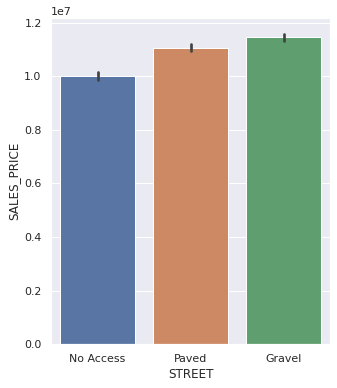

In [ ]:
sns.set_theme(style ="whitegrid")
sns.set(rc={'figure.figsize':(5,6)})
sns.barplot(x='STREET', y="SALES_PRICE",data=data,order =data.groupby("STREET")['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')["STREET"])

There is a linear relationship between street type and the sales price 

***MZZone vs Sales price***

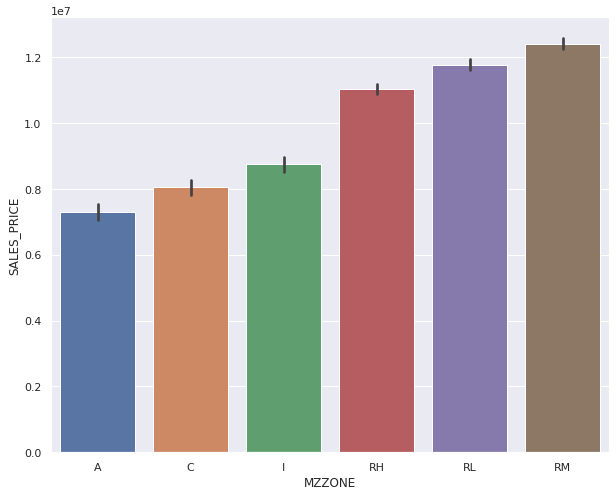

In [ ]:
sns.set_theme(style ="whitegrid")
sns.set(rc={'figure.figsize':(10,8)})
sns.barplot(x='MZZONE', y="SALES_PRICE",data=data,order =data.groupby("MZZONE")['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')["MZZONE"])

House price in agricultural zone is more cheap when compared to the house price in medium residential zone

There is a linear relationship between MZ zone and the sales price

**Visualize the features having continuous value using histogram**

***Histogram plot for int sqft***

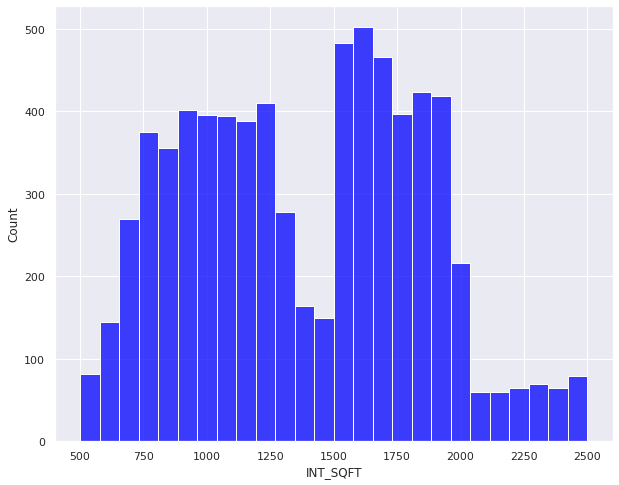

In [ ]:
sns.histplot(data['INT_SQFT'] ,  color ='blue')

***Histogram plot for Distance mainroad***

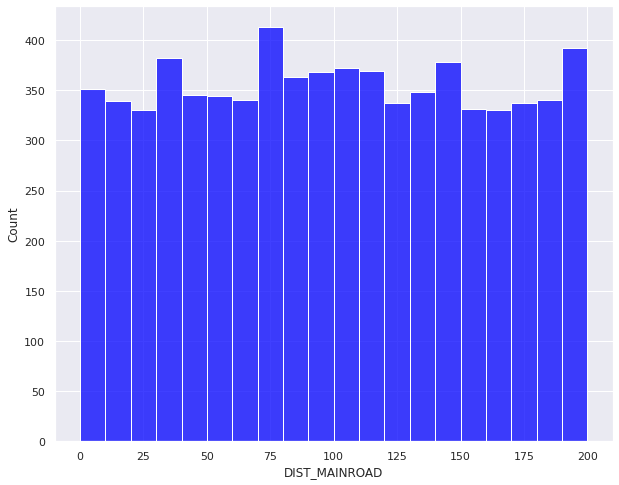

In [ ]:
sns.histplot(data['DIST_MAINROAD'] , color ='blue')

***Histogram plot for no of QS room***

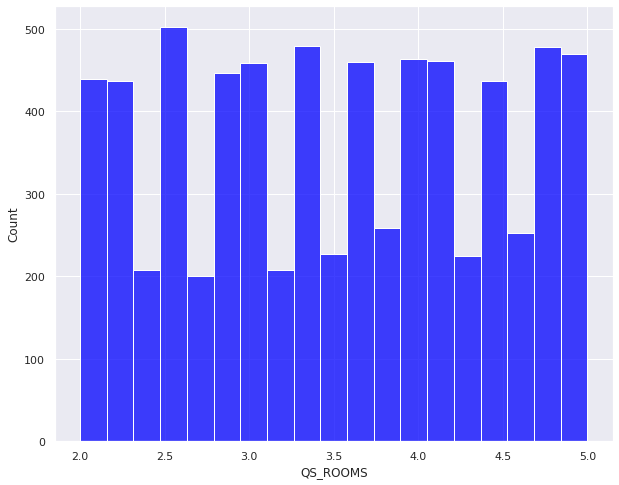

In [ ]:
sns.histplot(data['QS_ROOMS'] , color ='blue')

***Histogram plot for QS bathroom***

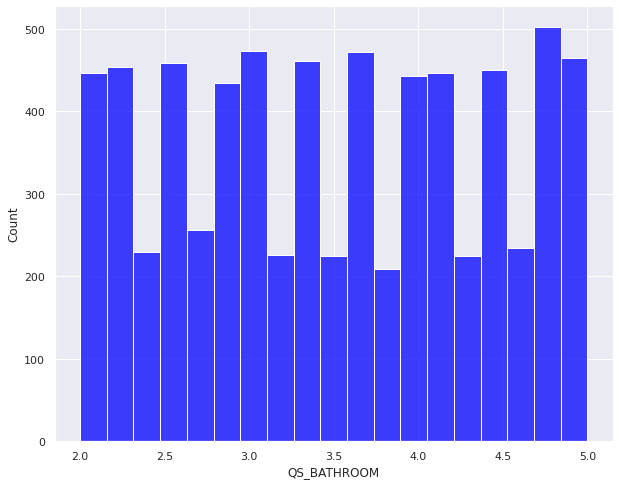

In [ ]:
sns.histplot(data['QS_BATHROOM'] ,  color ='blue')

***Histogram plot for QS bedroom***

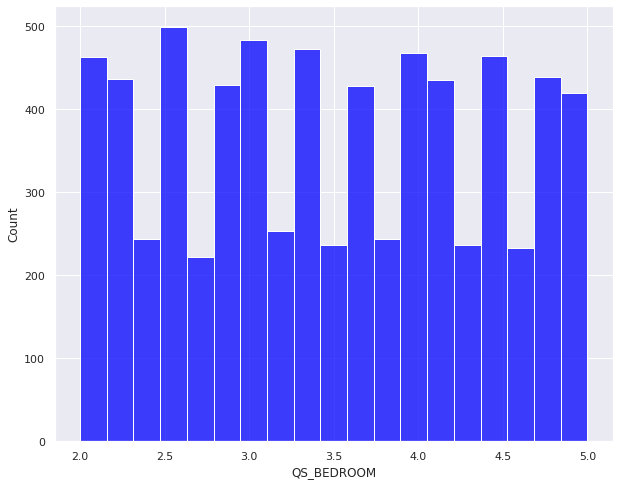

In [ ]:
sns.histplot(data['QS_BEDROOM'] , color ='blue')

***Histogram plot for QS overall***

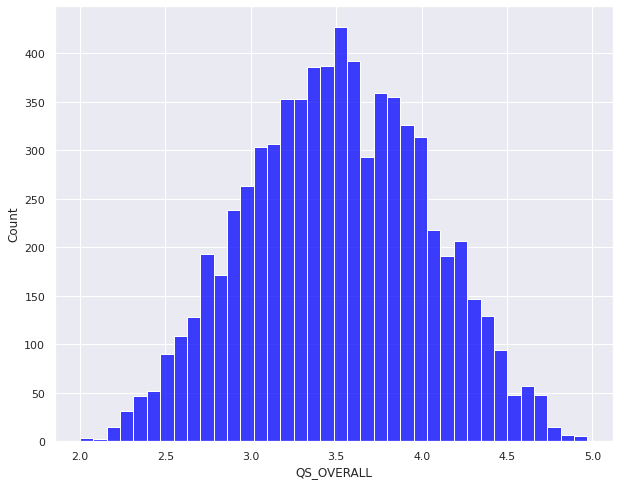

In [ ]:
sns.histplot(data['QS_OVERALL'] , color ='blue')

***Histogram plot for Age of house***

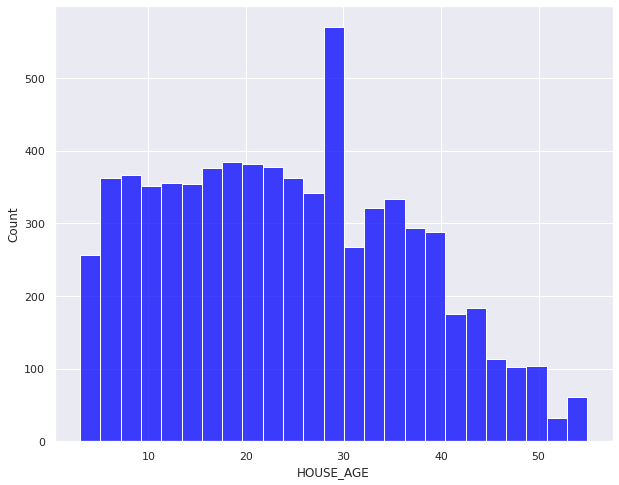

In [ ]:
sns.histplot(data['HOUSE_AGE'] , color ='blue')

***Histogram plot for price per sqft***

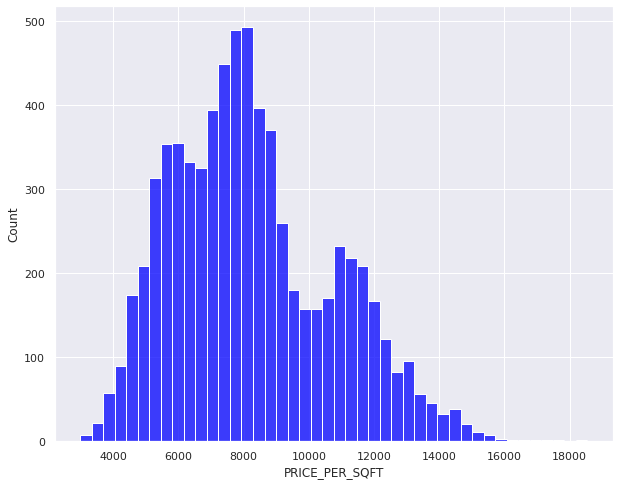

In [ ]:
sns.histplot(data['PRICE_PER_SQFT'] , color ='blue')

***Histogram plot for sales price***

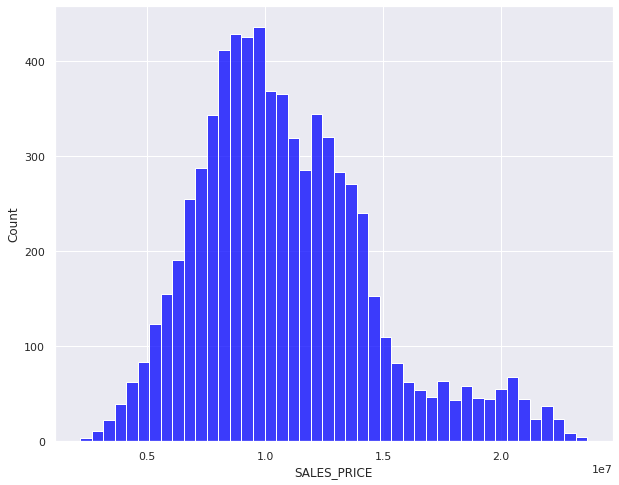

In [ ]:
sns.histplot(data['SALES_PRICE'] , color ='blue')

***Overall histogram plot for all features having continuous variable***

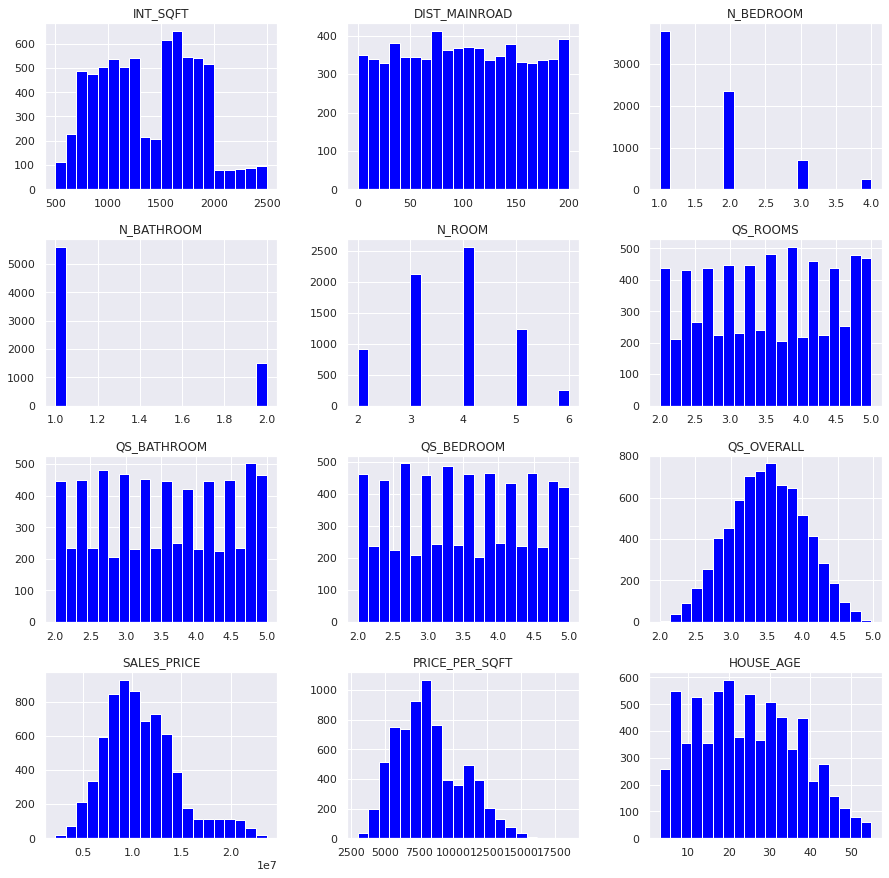

In [ ]:
data.hist(bins =20,figsize=(15,15),color = 'blue')
plt.show()

***Visualize using joint plot***

***Area vs Sales price***

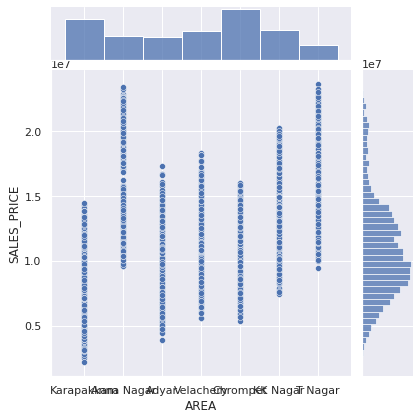

In [ ]:
sns.jointplot(x ='AREA', y ='SALES_PRICE', data = data)

***Int_Sqft vs Sales price***

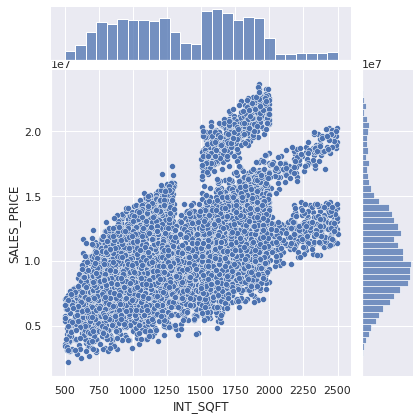

In [ ]:
sns.jointplot(x ='INT_SQFT', y ='SALES_PRICE', data = data)

***Distance mainroad vs Sales price***

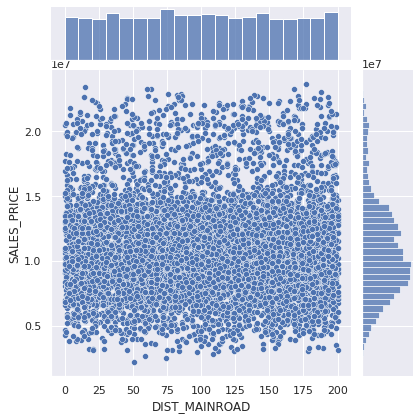

In [ ]:
sns.jointplot(x ='DIST_MAINROAD', y ='SALES_PRICE', data = data)

***No of bedroom vs Sales price***

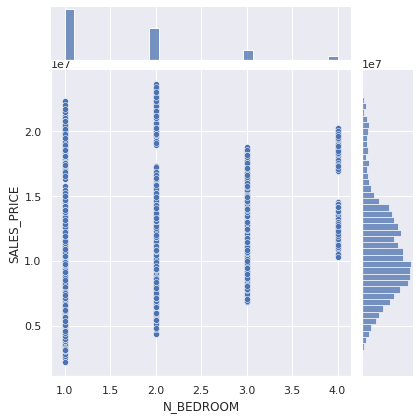

In [ ]:
sns.jointplot(x ='N_BEDROOM', y ='SALES_PRICE', data = data)

***No of bathroom vs Sales price***

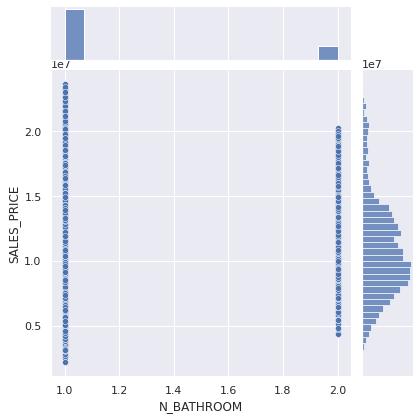

In [ ]:
sns.jointplot(x ='N_BATHROOM', y ='SALES_PRICE', data = data)

***No of room vs Sales price***

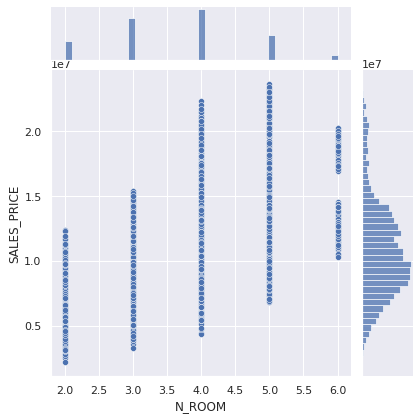

In [ ]:
sns.jointplot(x ='N_ROOM', y ='SALES_PRICE', data = data)

***Sale condition vs Sales price***

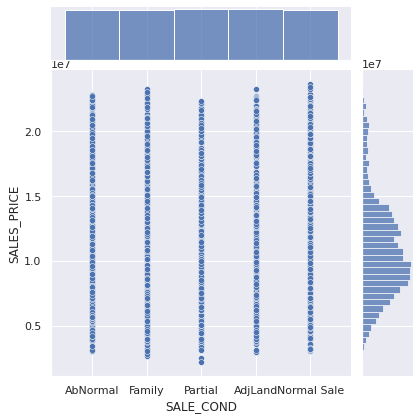

In [ ]:
sns.jointplot(x ='SALE_COND', y ='SALES_PRICE', data = data)

***Parking facility vs Sales price***

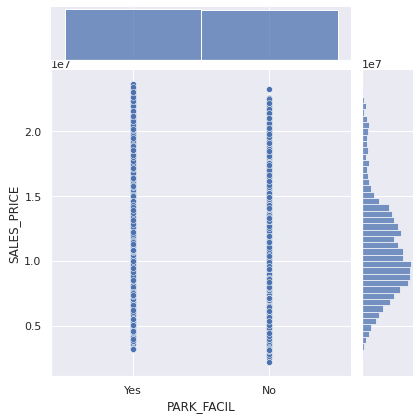

In [ ]:
sns.jointplot(x ='PARK_FACIL', y ='SALES_PRICE', data = data)

***Building type vs Sales price***

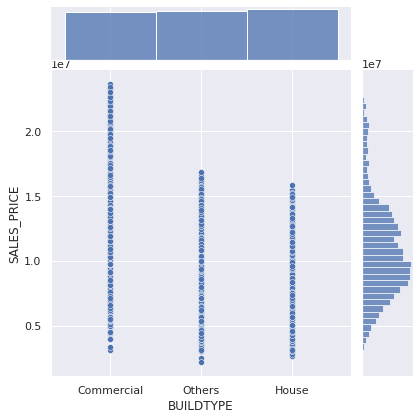

In [ ]:
sns.jointplot(x ='BUILDTYPE', y ='SALES_PRICE', data = data)

***Utility available vs Sales price***

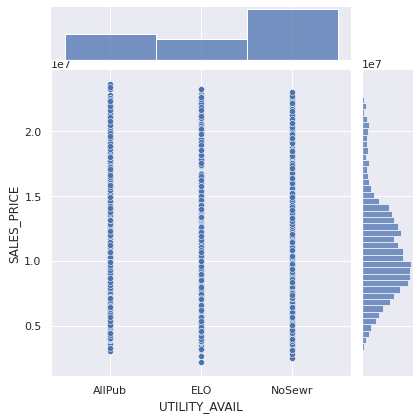

In [ ]:
sns.jointplot(x ='UTILITY_AVAIL', y ='SALES_PRICE', data = data)

***Street type vs Sales price***

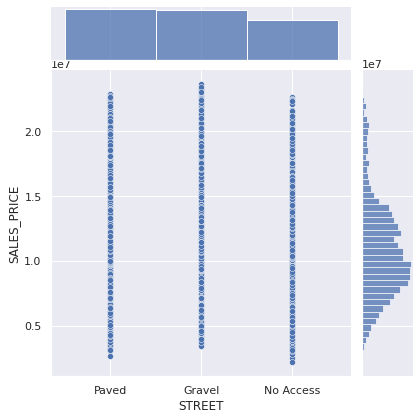

In [ ]:
sns.jointplot(x ='STREET', y ='SALES_PRICE', data = data)

***MZZone vs Sales price***

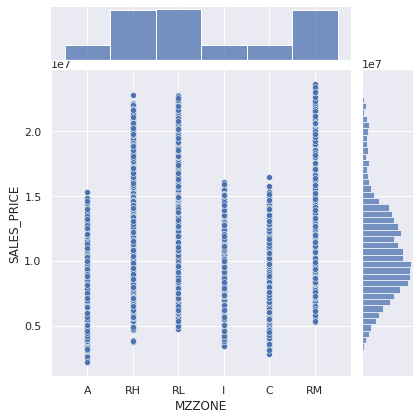

In [ ]:
sns.jointplot(x ='MZZONE', y ='SALES_PRICE', data = data)

***QS_room vs Sales price***

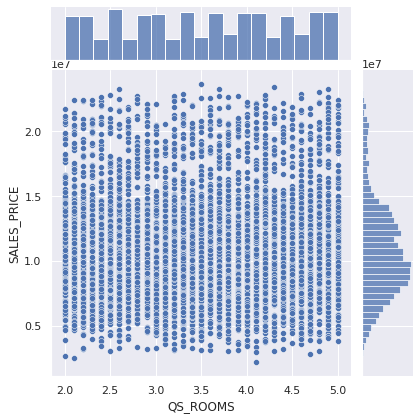

In [ ]:
sns.jointplot(x ='QS_ROOMS', y ='SALES_PRICE', data = data)

***QS_bathroom vs Sales price***

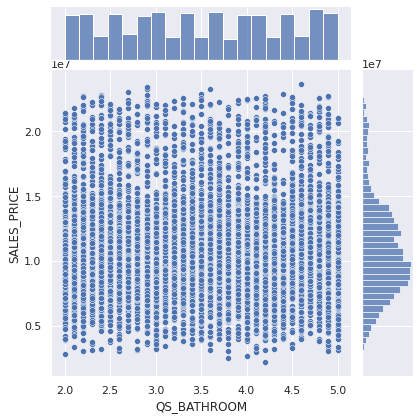

In [ ]:
sns.jointplot(x ='QS_BATHROOM', y ='SALES_PRICE', data = data)

***QS_bedroom vs Sales price***

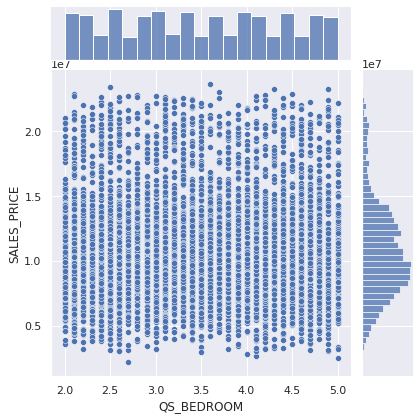

In [ ]:
sns.jointplot(x ='QS_BEDROOM', y ='SALES_PRICE', data = data)

***QS_Overall vs Sales price***

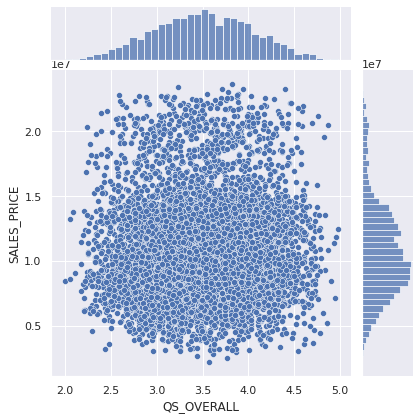

In [ ]:
sns.jointplot(x ='QS_OVERALL', y ='SALES_PRICE', data = data)

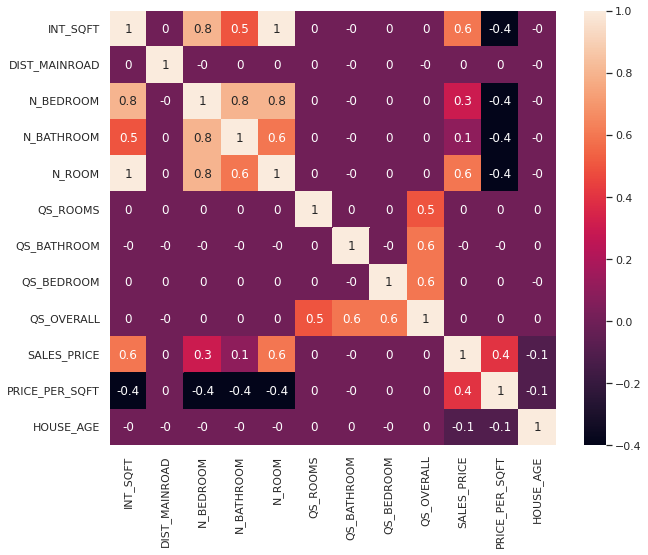

In [ ]:
#Find the correlation between all features 
corr_matrix=data.corr().round(1)
corr_matrix
sns.heatmap(data =corr_matrix,annot =True)

**Encoding the data**

Encode the data in order to convert the categorical values into numerical values 

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
encoder =LabelEncoder()
#data['AREA'] = encoder.fit_transform(data['AREA'])
data['SALE_COND'] = encoder.fit_transform(data['SALE_COND'])
data['PARK_FACIL'] =encoder.fit_transform(data['PARK_FACIL'])
#data['BUILDTYPE'] =encoder.fit_transform(data['BUILDTYPE'])
data['UTILITY_AVAIL'] =encoder.fit_transform(data['UTILITY_AVAIL'])
data['STREET'] =encoder.fit_transform(data['STREET'])
data['MZZONE'] =encoder.fit_transform(data['MZZONE'])
data['AREA']=data['AREA'].replace({'Karapakkam':1, 'Adyar': 2, 'Chrompet': '3', 'Velachery': '4', 'KK Nagar': '5', 'Anna Nagar': '6', 'T Nagar': '7'})
data

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,PRICE_PER_SQFT,HOUSE_AGE
0,1,1004,131,1.0,1.0,3,0,1,Commercial,0,2,0,4.0,3.9,4.9,4.330,7600000,7569.721116,44
1,6,1986,26,2.0,1.0,5,0,0,Commercial,0,0,3,4.9,4.2,2.5,3.765,21717770,10935.433031,11
2,2,909,70,1.0,1.0,3,0,1,Commercial,1,0,4,4.1,3.8,2.2,3.090,13159200,14476.567657,20
3,4,1855,14,3.0,2.0,5,2,0,Others,2,2,2,4.7,3.9,3.6,4.010,9630290,5191.530997,22
4,1,1226,84,1.0,1.0,3,0,1,Others,0,0,1,3.0,2.5,4.1,3.290,7406250,6040.986949,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,1,598,51,1.0,1.0,2,1,0,Others,1,1,5,3.0,2.2,2.4,2.520,5353000,8951.505017,49
7105,4,1897,52,3.0,2.0,5,2,1,Others,2,1,3,3.6,4.5,3.3,3.920,10818480,5702.941487,9
7106,4,1614,152,2.0,1.0,4,3,0,House,2,0,2,4.3,4.2,2.9,3.840,8351410,5174.355638,28
7107,1,787,40,1.0,1.0,2,4,1,Commercial,1,2,4,4.6,3.8,4.1,4.160,8507000,10809.402795,32


In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
data =pd.get_dummies(data,columns=['BUILDTYPE'])
data_new =data.copy()
data_new

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,UTILITY_AVAIL,STREET,...,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,PRICE_PER_SQFT,HOUSE_AGE,BUILDTYPE_Commercial,BUILDTYPE_House,BUILDTYPE_Others
0,1,1004,131,1.0,1.0,3,0,1,0,2,...,4.0,3.9,4.9,4.330,7600000,7569.721116,44,1,0,0
1,6,1986,26,2.0,1.0,5,0,0,0,0,...,4.9,4.2,2.5,3.765,21717770,10935.433031,11,1,0,0
2,2,909,70,1.0,1.0,3,0,1,1,0,...,4.1,3.8,2.2,3.090,13159200,14476.567657,20,1,0,0
3,4,1855,14,3.0,2.0,5,2,0,2,2,...,4.7,3.9,3.6,4.010,9630290,5191.530997,22,0,0,1
4,1,1226,84,1.0,1.0,3,0,1,0,0,...,3.0,2.5,4.1,3.290,7406250,6040.986949,30,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,1,598,51,1.0,1.0,2,1,0,1,1,...,3.0,2.2,2.4,2.520,5353000,8951.505017,49,0,0,1
7105,4,1897,52,3.0,2.0,5,2,1,2,1,...,3.6,4.5,3.3,3.920,10818480,5702.941487,9,0,0,1
7106,4,1614,152,2.0,1.0,4,3,0,2,0,...,4.3,4.2,2.9,3.840,8351410,5174.355638,28,0,1,0
7107,1,787,40,1.0,1.0,2,4,1,1,2,...,4.6,3.8,4.1,4.160,8507000,10809.402795,32,1,0,0


In [ ]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   AREA                  7109 non-null   object 
 1   INT_SQFT              7109 non-null   int64  
 2   DIST_MAINROAD         7109 non-null   int64  
 3   N_BEDROOM             7108 non-null   float64
 4   N_BATHROOM            7104 non-null   float64
 5   N_ROOM                7109 non-null   int64  
 6   SALE_COND             7109 non-null   int64  
 7   PARK_FACIL            7109 non-null   int64  
 8   UTILITY_AVAIL         7109 non-null   int64  
 9   STREET                7109 non-null   int64  
 10  MZZONE                7109 non-null   int64  
 11  QS_ROOMS              7109 non-null   float64
 12  QS_BATHROOM           7109 non-null   float64
 13  QS_BEDROOM            7109 non-null   float64
 14  QS_OVERALL            7061 non-null   float64
 15  SALES_PRICE          

In [ ]:
#check for nan and infinity values in the data and drop those values
data_new =data_new.dropna()
data_new[~data_new.isin([np.nan,np.inf,-np.inf]).any(1)]

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,UTILITY_AVAIL,STREET,...,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,PRICE_PER_SQFT,HOUSE_AGE,BUILDTYPE_Commercial,BUILDTYPE_House,BUILDTYPE_Others
0,1,1004,131,1.0,1.0,3,0,1,0,2,...,4.0,3.9,4.9,4.330,7600000,7569.721116,44,1,0,0
1,6,1986,26,2.0,1.0,5,0,0,0,0,...,4.9,4.2,2.5,3.765,21717770,10935.433031,11,1,0,0
2,2,909,70,1.0,1.0,3,0,1,1,0,...,4.1,3.8,2.2,3.090,13159200,14476.567657,20,1,0,0
3,4,1855,14,3.0,2.0,5,2,0,2,2,...,4.7,3.9,3.6,4.010,9630290,5191.530997,22,0,0,1
4,1,1226,84,1.0,1.0,3,0,1,0,0,...,3.0,2.5,4.1,3.290,7406250,6040.986949,30,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,1,598,51,1.0,1.0,2,1,0,1,1,...,3.0,2.2,2.4,2.520,5353000,8951.505017,49,0,0,1
7105,4,1897,52,3.0,2.0,5,2,1,2,1,...,3.6,4.5,3.3,3.920,10818480,5702.941487,9,0,0,1
7106,4,1614,152,2.0,1.0,4,3,0,2,0,...,4.3,4.2,2.9,3.840,8351410,5174.355638,28,0,1,0
7107,1,787,40,1.0,1.0,2,4,1,1,2,...,4.6,3.8,4.1,4.160,8507000,10809.402795,32,1,0,0


In [ ]:
data_new.isna().sum()

AREA                    0
INT_SQFT                0
DIST_MAINROAD           0
N_BEDROOM               0
N_BATHROOM              0
N_ROOM                  0
SALE_COND               0
PARK_FACIL              0
UTILITY_AVAIL           0
STREET                  0
MZZONE                  0
QS_ROOMS                0
QS_BATHROOM             0
QS_BEDROOM              0
QS_OVERALL              0
SALES_PRICE             0
PRICE_PER_SQFT          0
HOUSE_AGE               0
BUILDTYPE_Commercial    0
BUILDTYPE_House         0
BUILDTYPE_Others        0
dtype: int64

Splitting the data into train and test dataset

In [ ]:
X =data_new.drop(['SALES_PRICE'],axis=1).copy()
y = data_new['SALES_PRICE'].copy()


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,random_state =1)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(4727, 20)
(4727,)
(2329, 20)
(2329,)


In [ ]:
y_test.head()

2646     8213890
5805     7500750
6148     9168900
3857    12072650
2401     9827320
Name: SALES_PRICE, dtype: int64

Feature scaling

In [ ]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [ ]:
min_max_scaler =MinMaxScaler()
X_after_min_max_scaler =min_max_scaler.fit_transform(X)
print(X_after_min_max_scaler)

[[0.         0.252      0.655      ... 1.         0.         0.        ]
 [0.83333333 0.743      0.13       ... 1.         0.         0.        ]
 [0.16666667 0.2045     0.35       ... 1.         0.         0.        ]
 ...
 [0.5        0.557      0.76       ... 0.         1.         0.        ]
 [0.         0.1435     0.2        ... 1.         0.         0.        ]
 [0.5        0.698      0.78       ... 0.         0.         1.        ]]


In [ ]:
standardise =StandardScaler()
X_after_standardise =standardise.fit_transform(X)
print(X_after_standardise)

[[-1.37400033 -0.82414448  0.54757748 ...  1.43290743 -0.72545271
  -0.69810633]
 [ 1.33544753  1.32076394 -1.28169712 ...  1.43290743 -0.72545271
  -0.69810633]
 [-0.83211076 -1.0316458  -0.51514395 ...  1.43290743 -0.72545271
  -0.69810633]
 ...
 [ 0.25166839  0.50823244  0.9134324  ... -0.69788179  1.3784496
  -0.69810633]
 [-1.37400033 -1.29812119 -1.03779384 ...  1.43290743 -0.72545271
  -0.69810633]
 [ 0.25166839  1.12418374  0.98311905 ... -0.69788179 -0.72545271
   1.43244655]]


Fitting, predicting and evaluating the model to training data

**Linear regression**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score 

In [ ]:
#Fit the model and predict the test data
lr_model =LinearRegression()
lr_model.fit(X_train, y_train)
Y =lr_model.predict(X_test)
print(Y)


[ 8079566.46904377  7754085.83004455  8989461.54491422 ...
  9499448.83199005 13799858.55837042  7737621.72929385]


In [ ]:
#Evaluate the model
r2score =r2_score(y_test, Y)
print('R2_score: %.4f' % r2score)

R2_score: 0.9495


**Random Forest Regression model**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

In [ ]:
#Fit the model and predict the test data
rfr_model = RandomForestRegressor(random_state=1)
rfr_model.fit(X_train, y_train)
print(rfr_model.score(X_train,y_train))
print(rfr_model.score(X_test,y_test))
y_pred = rfr_model.predict(X_test)
y_pred

0.9992475285921867
0.9950050832898348


array([ 8235819.6 ,  7848878.75,  9309873.05, ...,  9228040.4 ,
       13509474.  ,  7032930.8 ])

In [ ]:
#Evaluate the model
r2score = r2_score(y_test, y_pred)
print('R2_score: %.4f' % r2score)

R2_score: 0.9950


**Support Vector Regression model**

In [ ]:
from sklearn.svm import SVR
sv_regressor = SVR(kernel = 'rbf')
sv_regressor.fit(X_train, y_train)
y_pred = sv_regressor.predict(X_test)
print(y_pred)


[10281490.42862373 10281347.75993622 10281531.59458688 ...
 10281333.42976558 10281493.83571297 10281278.57834161]


In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test,y_pred)
print(r2)

-0.028370352323170422


Decision tree regression model

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dtree_regressor = DecisionTreeRegressor()
dtree_regressor.fit(X_train, y_train)
y_pred = dtree_regressor.predict(X_test)
print(y_pred)

[ 8059250.  8061375.  9255790. ...  9316900. 13603120.  7085950.]


In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test,y_pred)
print(r2)

0.9850192424889516


**XGBoost Regression**

In [ ]:
from xgboost import XGBRegressor
xgb =XGBRegressor()
xgb.fit(X_train,y_train)
y_pred =xgb.predict(X_test)
y_pred

ValueError: ignored

In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test,y_pred)
print(r2)

0.9850192424889516


Among all the models such as Linear regression,Random forest regression,Support vector machine regression,Decision tree regression,XGBoost regression -the best model that fit with highest **R2 Score(0.996)** is "**Random forest regression**"

**Cross validation score**

In [ ]:
from sklearn.model_selection import cross_val_score
cross_val_score(rfr_model,X_train,y_train,scoring ='r2')


array([0.99325757, 0.99335328, 0.99331548, 0.99298129, 0.99400153])

**Finding the features importance**

In [ ]:
pd.DataFrame({'Feature importance':rfr_model.feature_importances_},index= X_train.columns).sort_values(by='Feature importance',ascending =False)


,Feature importance
AREA,0.472397
BUILDTYPE_Commercial,0.316806
INT_SQFT,0.112710
PRICE_PER_SQFT,0.058836
MZZONE,0.021043
PARK_FACIL,0.004086
N_ROOM,0.003115
N_BATHROOM,0.002506
N_BEDROOM,0.002149
STREET,0.001185


Therefore the top most important features that are to be considered while constructions are as follows

1.   AREA
2.   BULIDTYPE_Commercial
3.   INT_SQFT
4.   PRICE_PER_SQFT
5.   MZZONE
6.   PARK_FACIL
7.   N_ROOM
8.   N_BATHROOM
9.   N_BEDROOM
10.  STREET